<a href="https://colab.research.google.com/github/chinthasaicharan/TSF/blob/main/TSF_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction using supervised model

Importing the required libraries and reading data from url

In [64]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
data_url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(data_url)


First look at data

In [94]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [95]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Creating numpy arrays for the attributes(Features) as X and y as target variable

In [67]:
X = df.iloc[:, :-1].values
print((X))
y = df.iloc[:, 1].values  
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Spliting the data into training data and testing data

In [74]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=1)

selecting features and target variable

In [75]:
train_X = df[['Hours']]
train_y = df['Scores']

Importing Linear Regression from scikit-learn

In [76]:
from sklearn.linear_model import LinearRegression

Creating a model

In [77]:
model = LinearRegression()

Fitting training data into model

In [78]:
model.fit(train_X,train_y)

LinearRegression()

Predicting the testing data

In [79]:
print(test_X)
y_pred = model.predict(test_X)

[[1.1]
 [3.3]
 [1.9]
 [8.5]
 [4.8]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Actual vs Predicted (easier for visualization)

In [80]:
new_df = pd.DataFrame({'actual': test_y ,'predicted':y_pred})
new_df

,actual,predicted
0,17,13.237057
1,42,34.743825
2,24,21.057700
3,75,85.578002
4,54,49.407530


Predicted score if a student studies 9.25hrs/day

In [99]:
p = model.predict([[9.25]])
print(f'predicted score : {p[0]}')

predicted score : 92.9098547701573


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Visualization with matplotlib

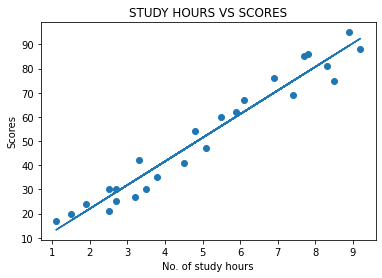

In [86]:
plt.scatter(X,y)
plt.xlabel('No. of study hours')
plt.ylabel('Scores')
plt.title('STUDY HOURS VS SCORES')
line = model.coef_*X + model.intercept_
plt.plot(X,line)

Validating the model by finding MEAN ABSOLUTE ERROR

In [102]:
from sklearn.metrics import mean_absolute_error
error_per = mean_absolute_error(test_y,y_pred)
print(f'The Mean Absolute Error of this model is : {error_per}')

The Mean Absolute Error of this model is : 5.826378193566591
